In [1]:
import os
from classy import Class
import numpy as np
from matplotlib import pyplot as plt
import initial
from cov_PP import ClassCovariancePP
from cov_BB_diag import ClassCovarianceBBDiag
from cov_PB import ClassCovariancePB

In [2]:
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
h = .6777
Omega_m = .307115
omega_b = 0.048206*h**2
sigma8_0 = .8288

# CLASS cosmo
params_cosmo = {
    'output': 'tCl mPk',
    'h': h,
    'omega_b': omega_b,
    'omega_cdm': Omega_m*h**2 - omega_b,
    'sigma8':sigma8_0,
    'n_s':.961,
    'tau_reio': 0.0826026,
    'N_ur': 2.,
    'z_max_pk': 3.,
    'P_k_max_h/Mpc': 50.,
    }

cosmo = Class()
cosmo.set(params_cosmo)
cosmo.compute()

initial_cosmo = initial.InputPowerSpectrum(.51, cosmo, params_fid=params_cosmo)
initial_cosmo.calcMatterPowerSpectrum()
k_in, pk_in = initial_cosmo.getMatterPowerSpectrum()
sigma8 = initial_cosmo.getSigma8z(sigma8_0)
f_of_z = initial_cosmo.getGrowthRate()
print(sigma8)
print(f_of_z)
params = {'sigma8':sigma8,'fz':f_of_z,'b1':2,'alpha_perp':1,
          'alpha_parallel':1,'b2':0,'b3':0,'bK2':0,'bK3':0,'bDK':0,'bO':0,}
kbin = np.arange(0.02, 0.22, .02)
volume = 1.76e9
nz = 3.26e-4
dk = .02

0.6359297950105864
0.7580956209620838


In [4]:
cov_PT_G = np.loadtxt("/home/rneveux/data/BOSS/Cov/RESULTS_COV_BOSS_North/RESULTS_COV_BOSS_North_ZBIN2/cov_pk0_bk000", usecols=(2,)).reshape(10,10)

In [5]:
%%time
covpb = ClassCovariancePB()
covpb.set_params(params)
covpb.set_input_pk(k_in,pk_in)

CPU times: user 96 µs, sys: 6 µs, total: 102 µs
Wall time: 115 µs


In [6]:
%%time
cpb = covpb.calc_cov_PB( 'cov_PB_NG_PB_diag', kbin=kbin, volume = volume, 
                        nmean = nz, deltaK = dk, ELL= 0, ell1_dash= 0, ell2_dash= 0, ELL_dash= 0)

k1 =  0.02 h/Mpc
k1 =  0.04 h/Mpc
k1 =  0.06 h/Mpc
k1 =  0.08 h/Mpc
k1 =  0.1 h/Mpc
k1 =  0.12000000000000001 h/Mpc
k1 =  0.13999999999999999 h/Mpc
k1 =  0.16 h/Mpc
k1 =  0.18 h/Mpc
k1 =  0.19999999999999998 h/Mpc
{'kbin1': array([[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06],
       [0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12],
       [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
       [0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16],
       [0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18],
       [0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ]]), 'kbin2': array([[0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ],
      

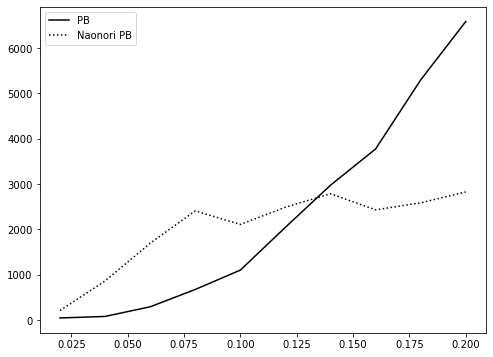

In [7]:
plt.plot(cpb['kbin1'][:,0], cpb['kbin1'][:,0]**6*np.diag(cpb['cov_PB']), color='k', label=r"PB")
plt.plot(kbin, kbin**6 * np.diag(cov_PT_G), label=r"Naonori PB", linestyle=':', color='k')
plt.legend()